Import libraries and dataset

In [1]:
# Import libraries

## Facebook page analysis starter ##
import html
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

## Additional package ##
import seaborn as sns    # enhanced data visualization

In [2]:
# Load Facebook dataset: Australian cosmetics company "Australis Cosmetics" page
df = pd.read_csv("https://raw.githubusercontent.com/multidis/hult-social-media-analytics/main/data/brand_posts.csv")
df

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...


Follow the analysis steps :

Step 1. Identify what types of posts in the dataset and how many entries of each post type are present

In [3]:
# Frequency for each type
for tp in df["type"].unique():
    ntp = len(df[df["type"] == tp])
    print(f"Type {tp} occurs {ntp} times")

Type photo occurs 1967 times
Type video occurs 42 times
Type link occurs 20 times
Type status occurs 15 times


Step 2. List the average number of shares for each post type

In [4]:
# Average of each type of shares
for etp in df["type"].unique():
    share = df[df["type"] == etp]["shares_count"].mean()
    print(f"Type {etp} shared {share.round(decimals = 2)} times on average")

Type photo shared 3.89 times on average
Type video shared 0.86 times on average
Type link shared 0.4 times on average
Type status shared 0.27 times on average


Step 3. Analyze the most common keywords occurring throughout the posts and visualize the results

In [5]:
# Clean up the text
## Text cleaning function ##
stop_words = set(stopwords.words('english'))

def text_cleanup(s):
    # if not a string object, disregard
    if not isinstance(s, str):
        return ''
    
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [6]:
# Add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
df['message_clean'] = df['message'].apply(text_cleanup)
df

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....,ummm yum would ultimate naughty treat
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...,click worry 3 3
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...,seems like celebs get away hair colour check n...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN,absolutely adore bling australis hq nothing ma...
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN,know want p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...,porcelain princess cant find foundation light ...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...,blend velourlips achieve perfect bold lip insp...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...,free brush alert help start year flawless face...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...,add glow look high life highlighting powder ed...


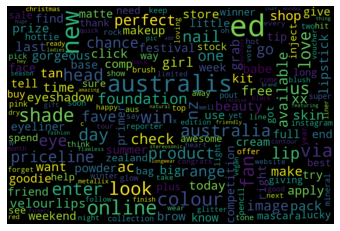

In [7]:
# Combine all post text entries
text_all = ' '.join(df['message_clean'])

# Keywords occurring throughout all of the posts
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text_all)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

<AxesSubplot:xlabel='keyword'>

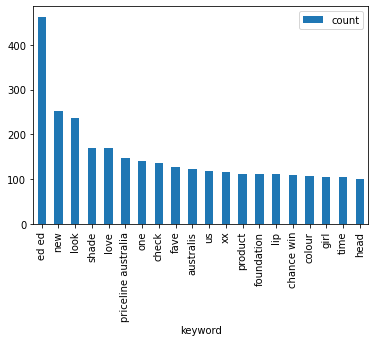

In [8]:
# Store the words used to create WordCloud as kwords
kwords = WordCloud().process_text(text_all)

# Transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')

# Plot a bar chart with the top keywords
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(20).plot.bar()

Step 4. Explore the times when posts were created for the most shared entries

In [9]:
df.sort_values(by='shares_count', ascending=False).head(20)['created_time']

1365    2014-09-19 16:30:01
218     2012-11-12 16:09:18
209     2012-11-08 09:40:34
130     2012-09-19 11:23:15
36      2012-07-16 17:15:59
1367    2014-09-24 19:30:00
39      2012-07-18 10:40:06
1       2012-06-21 15:09:46
540     2013-05-22 17:47:41
1715    2015-11-30 17:37:01
17      2012-07-03 10:48:12
199     2012-11-01 17:53:15
14      2012-06-29 15:35:46
1196    2014-06-10 16:45:01
1315    2014-08-11 18:35:00
1203    2014-06-13 16:20:01
857     2013-11-22 17:02:10
1419    2014-12-03 19:30:01
958     2014-01-28 14:15:38
55      2012-07-30 10:06:15
Name: created_time, dtype: object

Step 5. Identify the top-20 posts that received the most shares

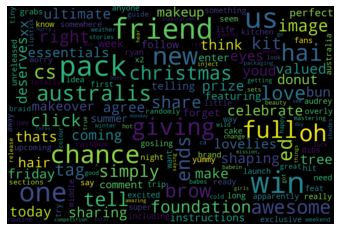

In [10]:
# Top-shared entries: combined text
text_shared = ' '.join(df.sort_values(by='shares_count', ascending=False)['message_clean'].head(20))

# Proceed generating a word cloud
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text_shared)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

<AxesSubplot:xlabel='keyword'>

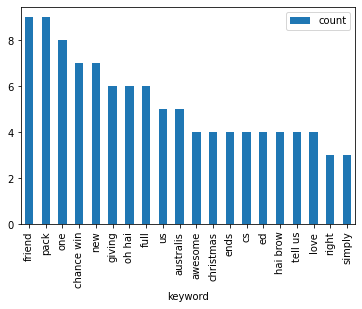

In [11]:
# Store the words used to create WordCloud as kwords1
kwords1 = WordCloud().process_text(text_shared)

# Transform that dictionary into a pandas DataFrame
df_kwords1 = pd.DataFrame(list(kwords1.items()), columns=['keyword', 'count']).set_index('keyword')

# Plot a bar chart with the top keywords
%matplotlib inline
df_kwords1.sort_values(by='count', ascending=False).head(20).plot.bar()

Additional Step. Analyze the relationship between each count

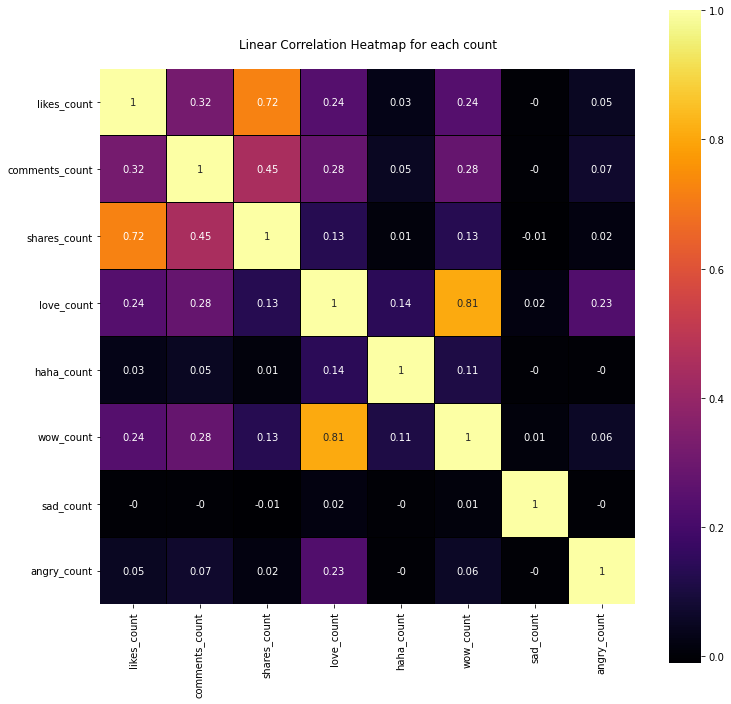

In [12]:
# Convert correlation matrix into a DataFrame
df_corr = df.corr(method = 'pearson').round(decimals = 2)

# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(12,12))


# developing a spicy heatmap
sns.heatmap(data       = df_corr, # the correlation matrix
            cmap       = 'inferno',      # changing to SPICY colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.5)           # how thick should the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for each count
""")

plt.show()